In [24]:
from visualstoryteller.getmorewords import get_more_words
from visualstoryteller.getmorepics import getmorepics # one noun per content pic
import spacy
import random
import matplotlib.pyplot as plt

In [7]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("I went to the beach with my three stupid dogs")
doc = nlp(text)
#print([token for token in doc if token.pos_ == "NOUN"])
# Analyze syntax
#print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
#print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

In [8]:
all_stopwords = nlp.Defaults.stop_words
tokens_without_sw= [token for token in doc if token.pos_ == "NOUN" and token not in all_stopwords]

print(tokens_without_sw)

[beach, dogs]


## getmorepics
only one noun per content image

In [20]:
text = 'A frog cooked to death slowly.'

In [16]:
text = 'A red frog cooked to blue death slowly.'

In [26]:
text = 'A frog would not realize a gradual change of water temperature if it was put in the cold water and the water is heated up slowly. It would die.'

In [39]:
nlp = spacy.load("en_core_web_sm")
# text = "Let's go to the beach if it's a bit warmer. I like cake and coffee so much, and I'm happy that this bootcamp is over. this demo day sucks"
doc = nlp(text.lower())

def noun_adj(adj,verb):
    if len(adj) > 0:
        return adj[random.randint(0, len(adj)-1)]
    elif len(verb) > 0:
        return verb[random.randint(0, len(verb)-1)]
    else:
        return 'love'

nouns_adjectives = []
verbs = [str(token.lemma_) for token in doc if token.pos_ == "VERB"]
chunks = [x.text for x in doc.noun_chunks]
for ch in chunks:
    chd = nlp(ch)
    nouns = [str(token) for token in chd if token.pos_ == "NOUN"]
    if len(nouns):
        adjectives = [str(token) for token in chd if token.pos_ == "ADJ"]
        for n in nouns:
            noun = n
            adj = noun_adj(adjectives, verbs)
            nouns_adjectives.append([noun, adj])
            
# max_number = 6
# while len(nouns_adjectives)>max_number:
#     del nouns_adjectives[random.randint(1,len(nouns_adjectives)-2)]
    
nouns_adjectives

[['frog', 'put'],
 ['change', 'gradual'],
 ['water', 'heat'],
 ['temperature', 'put'],
 ['water', 'cold'],
 ['water', 'heat']]

In [58]:
text = 'A good friend sent her a link to ugly clown coins'
doc = nlp(text)
nouns = [str(token) for token in doc if token.pos_ == "NOUN"]
verbs = [str(token.lemma_) for token in doc if token.pos_ == "VERB"]

In [61]:
adjectives = [str(token) for token in doc if token.pos_ == "ADJ"]

In [64]:
verbs = verbs + adjectives

In [11]:
get_more_words(text)

[['death', 'cook']]

In [31]:
text = 'A frog would not realize a gradual change of water temperature if it was put in the cold water and the water is heated up slowly. It would die.'
rr = getmorepics(text)

16384/13594 [====================================] - 0s 1us/step


In [32]:
len(rr['image'])

6

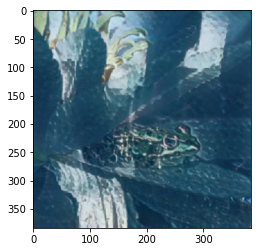

In [33]:
plt.imshow(rr['image'][0][0])

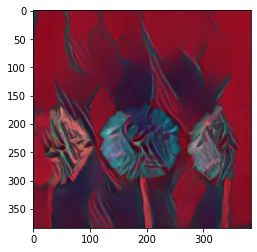

In [34]:
plt.imshow(rr['image'][1][0])

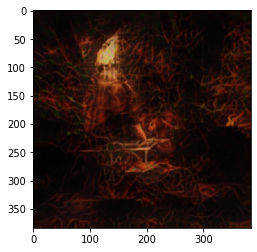

In [35]:
plt.imshow(rr['image'][2][0])

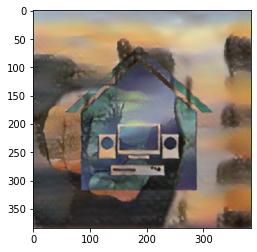

In [36]:
plt.imshow(rr['image'][3][0])


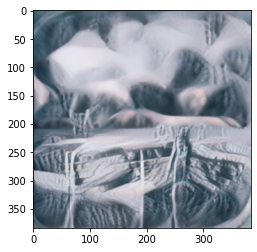

In [37]:
plt.imshow(rr['image'][4][0])


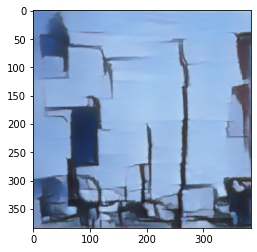

In [38]:
plt.imshow(rr['image'][5][0])

In [11]:
get_more_words('Demoday in the demobottle red')

[['Demoday', 'love'], ['demobottle', 'love'], ['red', 'love']]

In [12]:
getmorepics('Demoday in the demobottle red')

ValueError: empty range for randrange() (0, 0, 0)

In [1]:
from visualstoryteller.content import ContentImg

In [2]:
cnt = ContentImg()

In [3]:
print(cnt.get_content(['dlove']))

('nothing', 'dlove', 'nothing')


In [4]:
print(cnt.get_content(['demoday']))

('nothing', 'demoday', 'nothing')


In [5]:
print(cnt.get_content(['Curchill']))

['https://images.unsplash.com/photo-1567502400956-d7f451b518de?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwyMTEyNTd8MHwxfHNlYXJjaHwxfHxDdXJjaGlsbHxlbnwwfHx8fDE2MTUyODYwNDQ&ixlib=rb-1.2.1&q=80&w=400', 'Mika Baumeister', 'https://unsplash.com/@mbaumi']


In [6]:
print(cnt.get_content(['bear']))

('https://pixabay.com/get/g1d84f32a9fc1452e926d141a85e2d817055bbc6252fdc6111966bf919f1989a4003b792faf27212d797368f7584b1b288cba0fa4709c2052f2023851067f73e9_640.jpg', 'Pexels', '')


In [2]:
result = getmorepics('Demoday in the demobottle red')

In [3]:
result

{'OK': -1, 'wrong_word': 'Demoday'}

In [4]:
result = getmorepics('red Churchill')

In [5]:
result

{'OK': 0}

In [2]:
result = getmorepics('I have seen a beatiful fahrrad')

32768/32293 [==============================] - 0s 0us/step


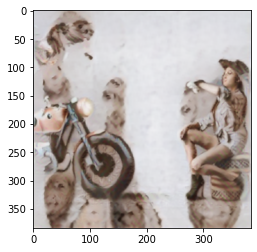

In [6]:
plt.imshow(result['image'][0][0])

In [7]:
result = getmorepics('Churchill likes to play')

40960/33878 [====================================] - 0s 0us/step


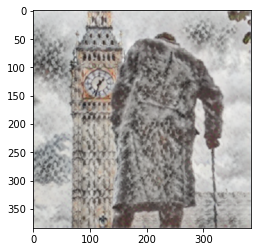

In [8]:
plt.imshow(result['image'][0][0])

In [9]:
import pandas as pd

In [10]:
!ls

Discovering_StyleTransfer.ipynb  brown.embedding
Exploring Unsplash API.ipynb     file.jpg
First take on the NPL .ipynb     playing_with_sapacyyy.ipynb
Get more words spacy.ipynb       vstflow.ipynb
NLP_joblib_model.ipynb           vstflow_stepbystep_weights.ipynb
Sentiment.csv                    work book.ipynb
Tweets.csv


In [11]:
dft = pd.read_csv('Tweets.csv')
dfs = pd.read_csv('Sentiment.csv')

In [19]:
dft = dft[['text']]

In [20]:
dfs = dfs[['text']]

In [30]:
dft['get'] = dft['text'].apply(get_more_words)
dfs['get'] = dfs['text'].apply(get_more_words)

KeyboardInterrupt: 

In [ ]:
dft.to_csv('tweets_get.csv')
dfs.to_csv('sentiment_get.csv')

In [31]:
dft.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
